# Installing requirements 

`pip install -r requirements.txt`

# Imports and connections

In [56]:
import numpy as np
from numpy import ndarray
import math
import matplotlib.pyplot as plt

# Practice work

Реализуем функции активации:

In [57]:
def linear(x: float) -> float:
    return x

def heaviside(x: float) -> float:
    return 0 if x < 0 else 1

def sigmoid(x: float) -> float:
    return 1/(1 + math.exp(-x))

# th в виде math.tanh

# arctg в виде math.atan

И нейрон с перцептроном:

In [58]:
class Neuron:
    def __init__(self, n_input: int, activation):
        self.w = np.random.randn(n_input)
        self.b = np.random.randn()
        self.f = activation

    def activate(self, x: np.ndarray):
        z = np.dot(x, self.w) + self.b
        return self.f(z)

    def learn(self, x: np.ndarray, y_true: float, y_pred: float, lr: float):
        error = y_true - y_pred
        self.w += lr * error * x
        self.b += lr * error


class Perceptron:
    def __init__(self, n_inputs: int, n_outputs: int, activation):
        self.neurons = [Neuron(n_inputs, activation) for _ in range(n_outputs)]

    def predict(self, x: np.ndarray):
        # Для одного входа x - вектор выходов
        return np.array([neuron.activate(x) for neuron in self.neurons])

    def fit(self, X: np.ndarray, y: np.ndarray, lr=0.1, epochs=100):
        weights_bias = []
        for epoch in range(epochs):
            # цикл обучения
            for i in range(len(X)):
                y_pred = self.predict(X[i])
                for j, neuron in enumerate(self.neurons):
                    neuron.learn(X[i], y[i, j], y_pred[j], lr)
            # цикл для вывода
            preds = []
            for x in X:
                for neuron in self.neurons:
                    preds.append(neuron.activate(x))
            accuracy = (np.array(y.reshape(-1) == preds).mean())
            print(f"Epoch {epoch}: total accuracy = {accuracy}")
            print({'weights': [neuron.w.copy() for neuron in self.neurons], 
                                  'bias': [neuron.b for neuron in self.neurons]})
            weights_bias.append([{'weights': [neuron.w.copy() for neuron in self.neurons], 
                                  'bias': [neuron.b for neuron in self.neurons]}])
            # в конце каждой эпохи складываем в возвращаемый список информацию о весах и смещении
        return weights_bias

    def get_weights(self):
        return [(n.w, n.b) for n in self.neurons]


In [59]:
perceptron_linear = Perceptron(2, 1, lambda x: linear(x))
perceptron_heaviside = Perceptron(2, 1, lambda x: heaviside(x))
perceptron_sigmoid = Perceptron(2, 1, lambda x: sigmoid(x))
perceptron_th = Perceptron(2, 1, lambda x: math.tanh(x))
perceptron_arctg = Perceptron(2, 1, lambda x: math.atanh(x))

In [60]:
SEED = 16
SIZE = 100

xor_x = np.array([[-1, -1], [1, -1], [-1, 1], [1, 1]])
xor_y = np.array([[0], [1], [1], [0]])

lin_sep_x = np.vstack([
    np.random.randn(SIZE, 2) + np.array([2, -2]),
    np.random.randn(SIZE, 2) + np.array([-2, 2])
    ])
lin_sep_y = np.array([[0]]*SIZE + [[1]]*SIZE)

nonlin_x = np.random.randn(SIZE * 2, 2)
nonlin_y = np.array([[0]]*SIZE + [[1]]*SIZE)

# lin_sep_y

Данные XOR:

(4, 1)
(4, 2)


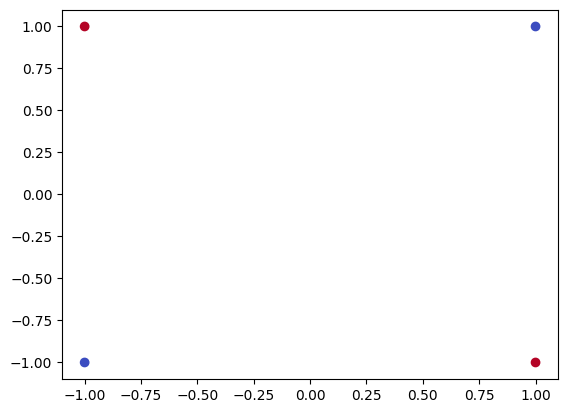

In [61]:
print(xor_y.shape)
print(xor_x.shape)
plt.scatter(x=xor_x[:,0], y=xor_x[:,1], c=xor_y, cmap='coolwarm')

Линейно разделимые данные:

(200, 2)


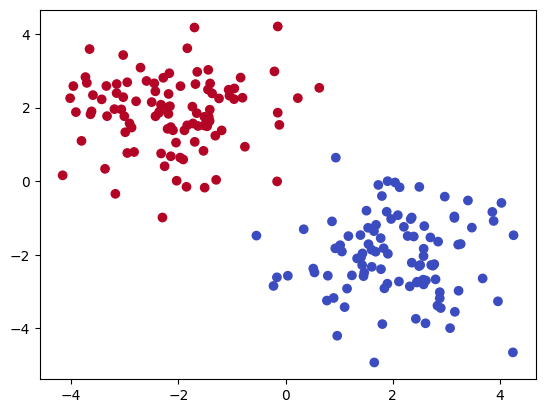

In [62]:
print(lin_sep_x.shape)

plt.scatter(x=lin_sep_x[:,0], y=lin_sep_x[:,1], c=lin_sep_y, cmap='coolwarm')

Линейно неразделимые данные:

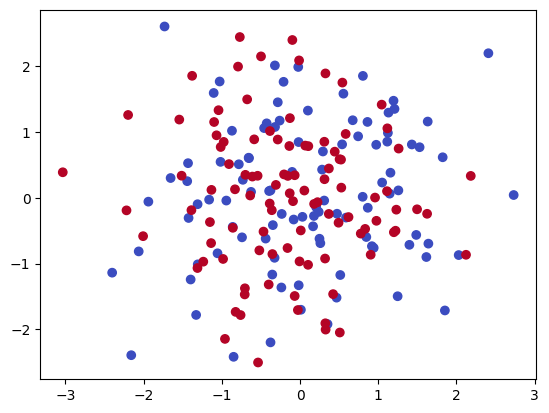

In [63]:
plt.scatter(x=nonlin_x[:,0], y=nonlin_x[:,1], c=nonlin_y, cmap='coolwarm')

Обучим модели:

In [64]:
perceptron_heaviside.fit(xor_x, xor_y, lr=0.1, epochs=10)

Epoch 0: total accuracy = 0.5
{'weights': [array([-0.31401311, -2.583057  ])], 'bias': [np.float64(0.9646045305170993)]}
Epoch 1: total accuracy = 0.5
{'weights': [array([-0.31401311, -2.383057  ])], 'bias': [np.float64(0.9646045305170993)]}
Epoch 2: total accuracy = 0.5
{'weights': [array([-0.31401311, -2.183057  ])], 'bias': [np.float64(0.9646045305170993)]}
Epoch 3: total accuracy = 0.5
{'weights': [array([-0.31401311, -1.983057  ])], 'bias': [np.float64(0.9646045305170993)]}
Epoch 4: total accuracy = 0.5
{'weights': [array([-0.31401311, -1.783057  ])], 'bias': [np.float64(0.9646045305170993)]}
Epoch 5: total accuracy = 0.5
{'weights': [array([-0.31401311, -1.583057  ])], 'bias': [np.float64(0.9646045305170993)]}
Epoch 6: total accuracy = 0.5
{'weights': [array([-0.31401311, -1.383057  ])], 'bias': [np.float64(0.9646045305170993)]}
Epoch 7: total accuracy = 0.75
{'weights': [array([-0.31401311, -1.183057  ])], 'bias': [np.float64(0.9646045305170993)]}
Epoch 8: total accuracy = 0.75


[[{'weights': [array([-0.31401311, -2.583057  ])],
   'bias': [np.float64(0.9646045305170993)]}],
 [{'weights': [array([-0.31401311, -2.383057  ])],
   'bias': [np.float64(0.9646045305170993)]}],
 [{'weights': [array([-0.31401311, -2.183057  ])],
   'bias': [np.float64(0.9646045305170993)]}],
 [{'weights': [array([-0.31401311, -1.983057  ])],
   'bias': [np.float64(0.9646045305170993)]}],
 [{'weights': [array([-0.31401311, -1.783057  ])],
   'bias': [np.float64(0.9646045305170993)]}],
 [{'weights': [array([-0.31401311, -1.583057  ])],
   'bias': [np.float64(0.9646045305170993)]}],
 [{'weights': [array([-0.31401311, -1.383057  ])],
   'bias': [np.float64(0.9646045305170993)]}],
 [{'weights': [array([-0.31401311, -1.183057  ])],
   'bias': [np.float64(0.9646045305170993)]}],
 [{'weights': [array([-0.31401311, -0.983057  ])],
   'bias': [np.float64(0.9646045305170993)]}],
 [{'weights': [array([-0.21401311, -0.883057  ])],
   'bias': [np.float64(0.8646045305170993)]}]]

In [65]:
perceptron_linear.fit(lin_sep_x, lin_sep_y, lr=0.1, epochs=10)

Epoch 0: total accuracy = 0.0
{'weights': [array([-0.09758876,  0.09761382])], 'bias': [np.float64(0.6479213518813121)]}
Epoch 1: total accuracy = 0.0
{'weights': [array([-0.07446654,  0.07448555])], 'bias': [np.float64(0.7313414729047147)]}
Epoch 2: total accuracy = 0.0
{'weights': [array([-0.07282786,  0.07284644])], 'bias': [np.float64(0.7372535067998439)]}
Epoch 3: total accuracy = 0.0
{'weights': [array([-0.07271172,  0.07273027])], 'bias': [np.float64(0.7376724961797253)]}
Epoch 4: total accuracy = 0.0
{'weights': [array([-0.07270349,  0.07272204])], 'bias': [np.float64(0.7377021902077987)]}
Epoch 5: total accuracy = 0.0
{'weights': [array([-0.07270291,  0.07272146])], 'bias': [np.float64(0.7377042946413371)]}
Epoch 6: total accuracy = 0.0
{'weights': [array([-0.07270287,  0.07272141])], 'bias': [np.float64(0.7377044437838014)]}
Epoch 7: total accuracy = 0.0
{'weights': [array([-0.07270286,  0.07272141])], 'bias': [np.float64(0.7377044543536171)]}
Epoch 8: total accuracy = 0.0
{'

[[{'weights': [array([-0.09758876,  0.09761382])],
   'bias': [np.float64(0.6479213518813121)]}],
 [{'weights': [array([-0.07446654,  0.07448555])],
   'bias': [np.float64(0.7313414729047147)]}],
 [{'weights': [array([-0.07282786,  0.07284644])],
   'bias': [np.float64(0.7372535067998439)]}],
 [{'weights': [array([-0.07271172,  0.07273027])],
   'bias': [np.float64(0.7376724961797253)]}],
 [{'weights': [array([-0.07270349,  0.07272204])],
   'bias': [np.float64(0.7377021902077987)]}],
 [{'weights': [array([-0.07270291,  0.07272146])],
   'bias': [np.float64(0.7377042946413371)]}],
 [{'weights': [array([-0.07270287,  0.07272141])],
   'bias': [np.float64(0.7377044437838014)]}],
 [{'weights': [array([-0.07270286,  0.07272141])],
   'bias': [np.float64(0.7377044543536171)]}],
 [{'weights': [array([-0.07270286,  0.07272141])],
   'bias': [np.float64(0.7377044551027062)]}],
 [{'weights': [array([-0.07270286,  0.07272141])],
   'bias': [np.float64(0.7377044551557944)]}]]

In [66]:
perceptron_heaviside.fit(lin_sep_x, lin_sep_y, lr=0.1, epochs=10)

Epoch 0: total accuracy = 1.0
{'weights': [array([-0.69761645,  0.46822253])], 'bias': [np.float64(0.2646045305170994)]}
Epoch 1: total accuracy = 1.0
{'weights': [array([-0.69761645,  0.46822253])], 'bias': [np.float64(0.2646045305170994)]}
Epoch 2: total accuracy = 1.0
{'weights': [array([-0.69761645,  0.46822253])], 'bias': [np.float64(0.2646045305170994)]}
Epoch 3: total accuracy = 1.0
{'weights': [array([-0.69761645,  0.46822253])], 'bias': [np.float64(0.2646045305170994)]}
Epoch 4: total accuracy = 1.0
{'weights': [array([-0.69761645,  0.46822253])], 'bias': [np.float64(0.2646045305170994)]}
Epoch 5: total accuracy = 1.0
{'weights': [array([-0.69761645,  0.46822253])], 'bias': [np.float64(0.2646045305170994)]}
Epoch 6: total accuracy = 1.0
{'weights': [array([-0.69761645,  0.46822253])], 'bias': [np.float64(0.2646045305170994)]}
Epoch 7: total accuracy = 1.0
{'weights': [array([-0.69761645,  0.46822253])], 'bias': [np.float64(0.2646045305170994)]}
Epoch 8: total accuracy = 1.0
{'

[[{'weights': [array([-0.69761645,  0.46822253])],
   'bias': [np.float64(0.2646045305170994)]}],
 [{'weights': [array([-0.69761645,  0.46822253])],
   'bias': [np.float64(0.2646045305170994)]}],
 [{'weights': [array([-0.69761645,  0.46822253])],
   'bias': [np.float64(0.2646045305170994)]}],
 [{'weights': [array([-0.69761645,  0.46822253])],
   'bias': [np.float64(0.2646045305170994)]}],
 [{'weights': [array([-0.69761645,  0.46822253])],
   'bias': [np.float64(0.2646045305170994)]}],
 [{'weights': [array([-0.69761645,  0.46822253])],
   'bias': [np.float64(0.2646045305170994)]}],
 [{'weights': [array([-0.69761645,  0.46822253])],
   'bias': [np.float64(0.2646045305170994)]}],
 [{'weights': [array([-0.69761645,  0.46822253])],
   'bias': [np.float64(0.2646045305170994)]}],
 [{'weights': [array([-0.69761645,  0.46822253])],
   'bias': [np.float64(0.2646045305170994)]}],
 [{'weights': [array([-0.69761645,  0.46822253])],
   'bias': [np.float64(0.2646045305170994)]}]]

In [67]:
perceptron_heaviside_nonlin = Perceptron(2, 1, heaviside)
perceptron_heaviside_nonlin.fit(nonlin_x, nonlin_y, lr=0.1, epochs=10)

Epoch 0: total accuracy = 0.51
{'weights': [array([-0.16860676, -0.02742928])], 'bias': [np.float64(0.38267849373533014)]}
Epoch 1: total accuracy = 0.5
{'weights': [array([-0.05640158,  0.04870737])], 'bias': [np.float64(0.28267849373533016)]}
Epoch 2: total accuracy = 0.5
{'weights': [array([-0.01189897,  0.06505164])], 'bias': [np.float64(0.18267849373533016)]}
Epoch 3: total accuracy = 0.5
{'weights': [array([-0.08528807,  0.10454698])], 'bias': [np.float64(0.38267849373533014)]}
Epoch 4: total accuracy = 0.5
{'weights': [array([-0.01178315,  0.05487952])], 'bias': [np.float64(0.2826784937353301)]}
Epoch 5: total accuracy = 0.5
{'weights': [array([-0.02157886,  0.1047905 ])], 'bias': [np.float64(0.2826784937353301)]}
Epoch 6: total accuracy = 0.5
{'weights': [array([-0.04066963,  0.11071914])], 'bias': [np.float64(0.38267849373533014)]}
Epoch 7: total accuracy = 0.5
{'weights': [array([0.00294329, 0.0517613 ])], 'bias': [np.float64(0.18267849373533016)]}
Epoch 8: total accuracy = 0

[[{'weights': [array([-0.16860676, -0.02742928])],
   'bias': [np.float64(0.38267849373533014)]}],
 [{'weights': [array([-0.05640158,  0.04870737])],
   'bias': [np.float64(0.28267849373533016)]}],
 [{'weights': [array([-0.01189897,  0.06505164])],
   'bias': [np.float64(0.18267849373533016)]}],
 [{'weights': [array([-0.08528807,  0.10454698])],
   'bias': [np.float64(0.38267849373533014)]}],
 [{'weights': [array([-0.01178315,  0.05487952])],
   'bias': [np.float64(0.2826784937353301)]}],
 [{'weights': [array([-0.02157886,  0.1047905 ])],
   'bias': [np.float64(0.2826784937353301)]}],
 [{'weights': [array([-0.04066963,  0.11071914])],
   'bias': [np.float64(0.38267849373533014)]}],
 [{'weights': [array([0.00294329, 0.0517613 ])],
   'bias': [np.float64(0.18267849373533016)]}],
 [{'weights': [array([-0.11052171,  0.0663068 ])],
   'bias': [np.float64(0.38267849373533014)]}],
 [{'weights': [array([-0.06795791,  0.0180727 ])],
   'bias': [np.float64(0.28267849373533016)]}]]

In [68]:
perceptron_arctg_nonlin = Perceptron(2, 1, math.atan)
perceptron_arctg_nonlin.fit(nonlin_x, nonlin_y, lr=0.1, epochs=10)

Epoch 0: total accuracy = 0.0
{'weights': [array([-0.02909163, -0.00264713])], 'bias': [np.float64(1.5152282937978647)]}
Epoch 1: total accuracy = 0.0
{'weights': [array([-0.02909161, -0.00264708])], 'bias': [np.float64(1.5152283599393592)]}
Epoch 2: total accuracy = 0.0
{'weights': [array([-0.02909161, -0.00264708])], 'bias': [np.float64(1.5152283599393908)]}
Epoch 3: total accuracy = 0.0
{'weights': [array([-0.02909161, -0.00264708])], 'bias': [np.float64(1.5152283599393908)]}
Epoch 4: total accuracy = 0.0
{'weights': [array([-0.02909161, -0.00264708])], 'bias': [np.float64(1.5152283599393908)]}
Epoch 5: total accuracy = 0.0
{'weights': [array([-0.02909161, -0.00264708])], 'bias': [np.float64(1.5152283599393908)]}
Epoch 6: total accuracy = 0.0
{'weights': [array([-0.02909161, -0.00264708])], 'bias': [np.float64(1.5152283599393908)]}
Epoch 7: total accuracy = 0.0
{'weights': [array([-0.02909161, -0.00264708])], 'bias': [np.float64(1.5152283599393908)]}
Epoch 8: total accuracy = 0.0
{'

[[{'weights': [array([-0.02909163, -0.00264713])],
   'bias': [np.float64(1.5152282937978647)]}],
 [{'weights': [array([-0.02909161, -0.00264708])],
   'bias': [np.float64(1.5152283599393592)]}],
 [{'weights': [array([-0.02909161, -0.00264708])],
   'bias': [np.float64(1.5152283599393908)]}],
 [{'weights': [array([-0.02909161, -0.00264708])],
   'bias': [np.float64(1.5152283599393908)]}],
 [{'weights': [array([-0.02909161, -0.00264708])],
   'bias': [np.float64(1.5152283599393908)]}],
 [{'weights': [array([-0.02909161, -0.00264708])],
   'bias': [np.float64(1.5152283599393908)]}],
 [{'weights': [array([-0.02909161, -0.00264708])],
   'bias': [np.float64(1.5152283599393908)]}],
 [{'weights': [array([-0.02909161, -0.00264708])],
   'bias': [np.float64(1.5152283599393908)]}],
 [{'weights': [array([-0.02909161, -0.00264708])],
   'bias': [np.float64(1.5152283599393908)]}],
 [{'weights': [array([-0.02909161, -0.00264708])],
   'bias': [np.float64(1.5152283599393908)]}]]

# Answers to questions

1. Что делает функция активации в искусственном нейроне?
> Функция активации определяет величину выходного сигнала в зависимости от значений сигналов на входе
2. Чем отличается искусственный нейрон от однослойного перцептрона
> Однослойный перцептрон является слоем из искуственных нейронов
3. Какое правило используется для обучения перцептрона?
> Используется правило перцептрона:
> 
> $W = W + \eta * (y - y_{pred}) * x^T$
> 
> $b = b + \eta * (y - y_{pred})$
>
> где $W$ - матрица весов слоя, $b$ - вектор смещений, $y$ - истинные значения, $y_{pred}$ - предсказанные значения, $\eta$ - скорость обучения
4. Почему однослойный перцептрон не может решить задачу XOR?
> Потому что однослойный перцептрон может разделять только линейно разделимые множества точек
5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?
> - Можно использовать градиентный спуск для обучения
> - Выход становится непрерывным -> можно строить вероятности принадлежности классу